# Régression linéaire

In [1]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt

### Création des données immobilières

In [2]:
size = 50
square_meters = np.random.randint(10, 100, size=(size))
square_meters = square_meters.reshape(size, 1)
square_meters = square_meters.astype('float32') 

In [3]:
price = (square_meters * 11000) + (np.random.randn(50,1) * 150000)
price = price.astype('float32')

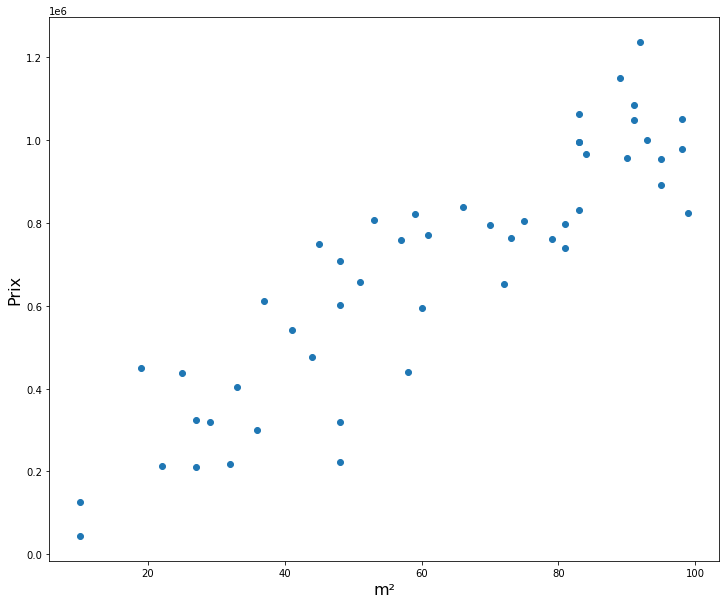

In [4]:
plt.figure(figsize=(12,10))
plt.scatter(square_meters, price)
plt.xlabel("m²", size = 16)
plt.ylabel("Prix", size = 16)
plt.show()

### Conversion en Tenseur

In [5]:
square_meters = torch.from_numpy(square_meters)
price = torch.from_numpy(price)
print(square_meters.shape)
print(price.shape)

torch.Size([50, 1])
torch.Size([50, 1])


###  Création du modèle

In [6]:
import torch.nn as nn
model = nn.Linear(1, 1)

### Mise en oeuvre du modèle

In [7]:
nb_iter = 100
lr = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr)

In [8]:
loss_fn = nn.MSELoss()

In [9]:
for i in range(nb_iter):
    price_pred = model(square_meters)
    loss = loss_fn(price_pred, price)
    if (i % 10 == 0):
        print("epoch {} : loss : {}".format(i, loss.item()))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

epoch 0 : loss : 558359117824.0
epoch 10 : loss : 18048935936.0
epoch 20 : loss : 18048616448.0
epoch 30 : loss : 18048296960.0
epoch 40 : loss : 18047977472.0
epoch 50 : loss : 18047660032.0
epoch 60 : loss : 18047340544.0
epoch 70 : loss : 18047021056.0
epoch 80 : loss : 18046701568.0
epoch 90 : loss : 18046382080.0


### Les résultats

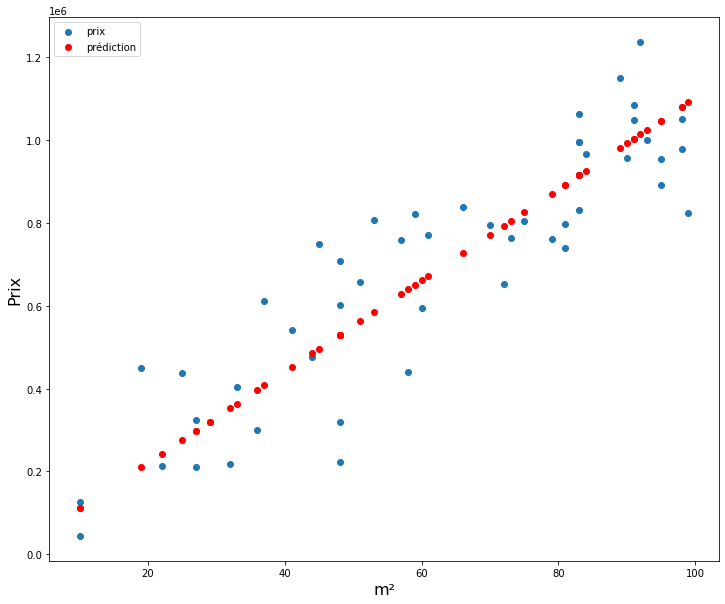

In [10]:
with torch.no_grad():
    plt.figure(figsize=(12,10))
    plt.scatter(square_meters.numpy(), price.numpy(), label="prix")
    plt.scatter(square_meters.numpy(), price_pred.numpy(), c='red', label="prédiction")
    plt.xlabel("m²", size = 16)
    plt.ylabel("Prix", size = 16)
    plt.legend()
    plt.show()

In [11]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

weight tensor([[11013.3887]])
bias tensor([329.8901])


In [12]:
from sklearn.metrics import r2_score

with torch.no_grad():
    coef_determination = r2_score(price_pred.numpy(), price.numpy())
    print("Coefficient de détermination : {:.2f} %".format(coef_determination * 100))

Coefficient de détermination : 78.00 %
